In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

Data Description:
Break down the dataset in detail, describing what each column represents:

RowNumber: A unique identifier for each row in the dataset.

CustomerId: Unique customer identification number.

Surname: The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).

CreditScore: The customer's credit score at the time of data collection.

Geography: The customer's country or region, providing insights into location-based trends in churn.

Gender: The customer's gender.

Age: The customer's age, valuable for demographic analysis.

Tenure: The number of years the customer has been with the bank.

Balance: The customer's account balance.

NumOfProducts: The number of products the customer has purchased or subscribed to.

HasCrCard: Indicates whether the customer has a credit card (1) or not (0).

IsActiveMember: Indicates whether the customer is an active member (1) or not (0).

EstimatedSalary: The customer's estimated salary.

Exited: The target variable, indicating whether the customer has churned (1) or not (0).

In [14]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Descriptive Statistics

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [13]:
data.describe(include = object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


# Data Preprocessing

In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
df = data.drop(columns = ['RowNumber','CustomerId','Surname'])

# Univariate Analysis

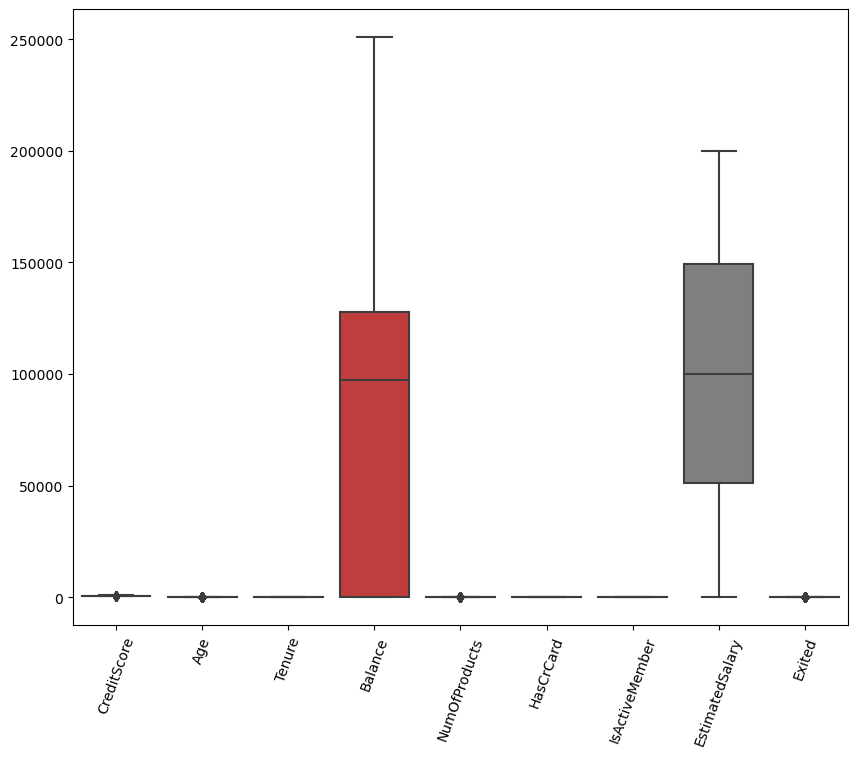

In [20]:
plt.figure(figsize= (10,8))
sns.boxplot(df)
plt.xticks(rotation = 70)
plt.show()

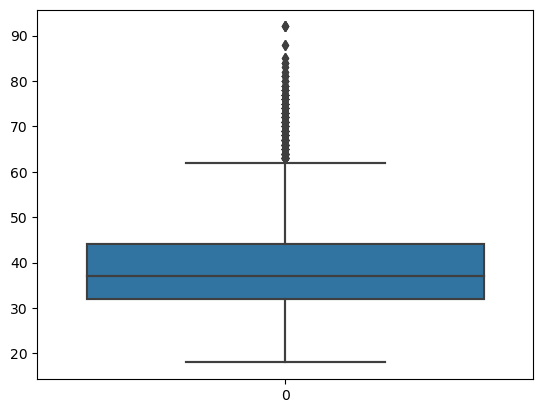

In [22]:
sns.boxplot(df['Age'])
plt.show()

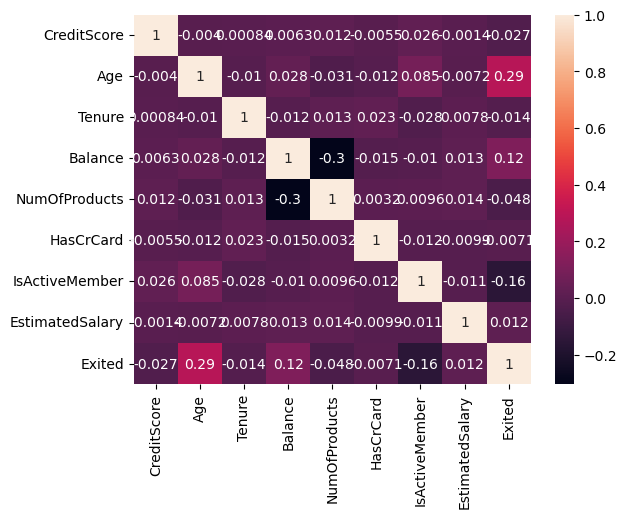

In [29]:
sns.heatmap(df.select_dtypes(include= np.number).corr(), annot= True)
plt.show()

In [30]:
x = df.drop(columns = 'Exited')
y = df['Exited']

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.9, stratify= y)

In [34]:
# Frequency Encoding for Geography
geo_encoding = xtrain['Geography'].value_counts().to_dict()
xtrain['Geography'] = xtrain['Geography'].map(geo_encoding)
xtest['Geography'] = xtest['Geography'].map(geo_encoding)

In [36]:
# Dummy Encoding for Gender
xtrain = pd.get_dummies(xtrain, drop_first= True, dtype= int)
xtest = pd.get_dummies(xtest, drop_first= True, dtype= int)

In [40]:
xtrain

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
6730,631,2227,46,9,160736.63,1,0,1,93503.02,1
3233,595,2227,36,6,85768.42,1,1,1,24802.77,1
6920,644,4519,38,3,0.00,2,1,1,79928.41,1
5022,734,4519,45,2,0.00,2,1,0,99593.28,1
1183,652,4519,36,1,0.00,2,1,1,151314.98,1
...,...,...,...,...,...,...,...,...,...,...
6470,583,2254,41,5,77647.60,1,1,0,190429.52,0
8874,582,2254,50,6,96486.57,2,1,1,20344.02,0
8772,768,4519,30,6,0.00,2,1,1,199454.37,1
7881,774,2227,46,9,0.00,2,1,1,34774.26,1


In [41]:
xtest

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
861,548,4519,32,2,172448.77,1,1,0,188083.77,0
7668,526,2254,61,6,133845.28,2,1,1,45180.80,1
482,798,4519,37,8,0.00,3,0,0,110783.28,1
3239,762,2227,19,6,0.00,2,1,0,55500.17,0
538,564,2254,62,5,114931.35,3,0,1,18260.98,0
...,...,...,...,...,...,...,...,...,...,...
5441,751,4519,29,1,135536.50,1,1,0,66825.33,1
4855,490,2254,33,5,96341.00,2,0,0,108313.34,1
1618,697,4519,27,8,141223.68,2,1,0,90591.15,1
4344,528,4519,26,10,102073.67,2,0,0,166799.93,0



# Predictive Modeling

In [44]:
from sklearn.linear_model import LogisticRegression
lt = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
from xgboost import XGBClassifier
xgb = XGBClassifier()
from sklearn.ensemble import HistGradientBoostingClassifier
hist = HistGradientBoostingClassifier()
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [66]:
model_name = []
accu = []
recl = []
prec = []
f1 = []
def model_validation(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain, ytrain)
    fpr, tpr, thre = roc_curve(ytest, model.predict_proba(xtest)[:,1])
    print('Confusion Matrix\n', confusion_matrix(ytest, model.predict(xtest)))
    print('Classification Report\n', classification_report(ytest, model.predict(xtest)))
    print('ROC AUC SCORE\n', roc_auc_score(ytest, model.predict_proba(xtest)[:,1]))
    plt.plot([0,1],[0,1], color = 'red')
    plt.plot(fpr,tpr)
    plt.show()
    
    response = input('Do you want to keep the Model? Yes')
    if response.lower() == 'yes':
        model_name.append(str(model))
        accu.append(accuracy_score(ytest, model.predict(xtest)))
        recl.append(recall_score(ytest, model.predict(xtest)))
        prec.append(precision_score(ytest, model.predict(xtest)))
        f1.append(f1_score(ytest, model.predict(xtest)))
        global score_df
        score_df = pd.DataFrame({'Model': model_name, 
                                 'Accuracy': accu, 
                                 'Recall': recl, 
                                 'Precision': prec,
                                 'F1 Score': f1})
        return model

# Decision Trees

Confusion Matrix
 [[766  30]
 [112  92]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.75      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000

ROC AUC SCORE
 0.8358828456005518


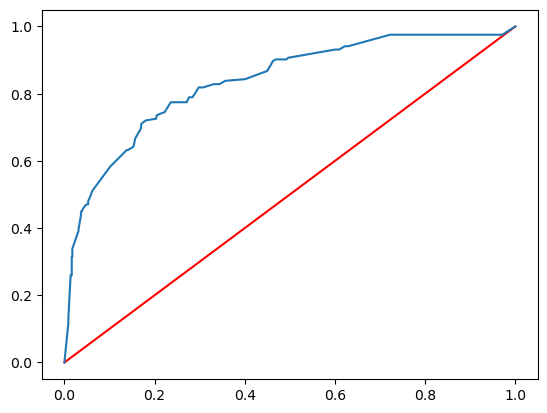

Do you want to keep the Model? Yesyes


DecisionTreeClassifier(max_depth=8)

In [69]:
model_validation(DecisionTreeClassifier(max_depth= 8), xtrain, ytrain, xtest, ytest)

# Naive Bayes

Confusion Matrix
 [[771  25]
 [178  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       796
           1       0.51      0.13      0.20       204

    accuracy                           0.80      1000
   macro avg       0.66      0.55      0.54      1000
weighted avg       0.75      0.80      0.74      1000

ROC AUC SCORE
 0.7882611587348507


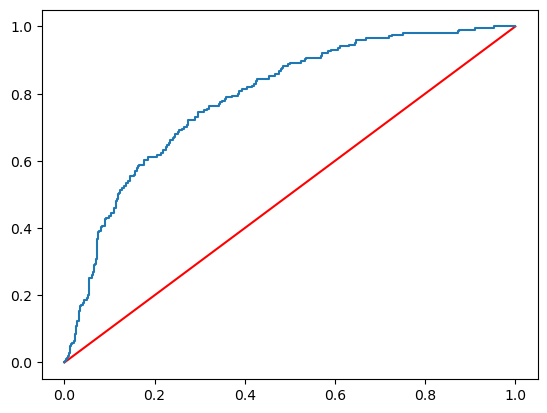

Do you want to keep the Model? Yesyes


GaussianNB()

In [70]:
model_validation(GaussianNB(), xtrain, ytrain, xtest, ytest)

# Random Forest

Confusion Matrix
 [[776  20]
 [107  97]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.83      0.48      0.60       204

    accuracy                           0.87      1000
   macro avg       0.85      0.73      0.76      1000
weighted avg       0.87      0.87      0.86      1000

ROC AUC SCORE
 0.8684229973396393


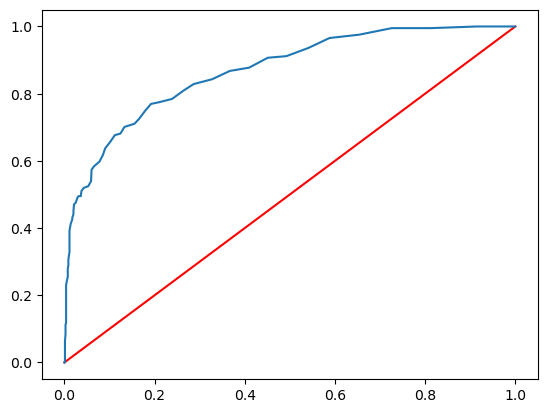

Do you want to keep the Model? Yesyes


RandomForestClassifier(n_estimators=70)

In [67]:
model_validation(RandomForestClassifier(n_estimators=70), xtrain, ytrain, xtest, ytest)

# AdaBoost

C:\Users\mirza\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix
 [[768  28]
 [107  97]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.78      0.48      0.59       204

    accuracy                           0.86      1000
   macro avg       0.83      0.72      0.75      1000
weighted avg       0.86      0.86      0.85      1000

ROC AUC SCORE
 0.8677702236673565


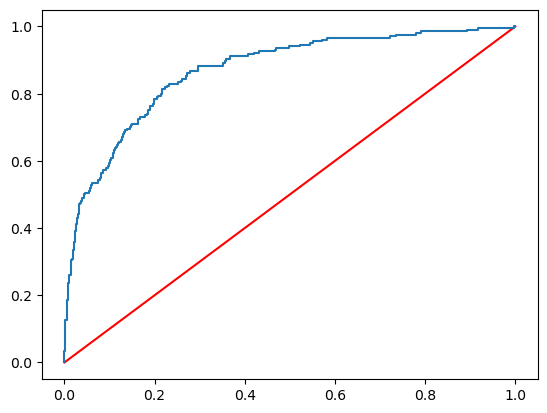

Do you want to keep the Model? Yesyes


AdaBoostClassifier(n_estimators=200)

In [72]:
model_validation(AdaBoostClassifier(n_estimators=200), xtrain, ytrain, xtest, ytest)

# Gradient Boost

Confusion Matrix
 [[770  26]
 [104 100]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.79      0.49      0.61       204

    accuracy                           0.87      1000
   macro avg       0.84      0.73      0.76      1000
weighted avg       0.86      0.87      0.86      1000

ROC AUC SCORE
 0.8667479554635924


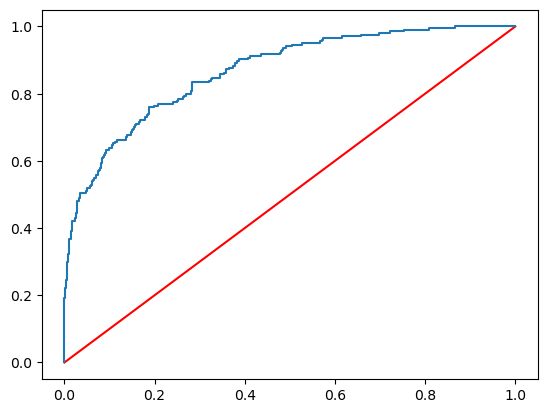

Do you want to keep the Model? Yesyes


GradientBoostingClassifier(max_depth=7, n_estimators=150)

In [77]:
model_validation(GradientBoostingClassifier(n_estimators=150, max_depth= 7), xtrain, ytrain, xtest, ytest)

# XG Boost

Confusion Matrix
 [[760  36]
 [ 99 105]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.74      0.51      0.61       204

    accuracy                           0.86      1000
   macro avg       0.81      0.73      0.76      1000
weighted avg       0.86      0.86      0.86      1000

ROC AUC SCORE
 0.8556508030347818


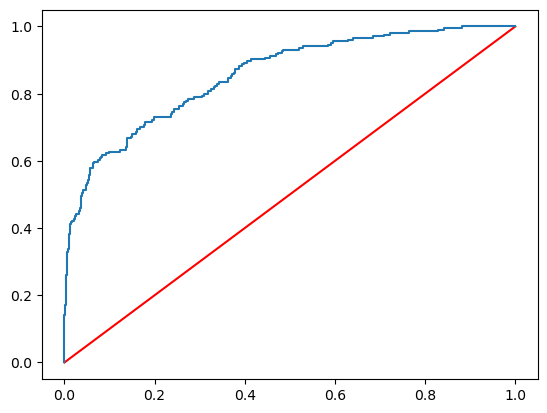

Do you want to keep the Model? Yesyes


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
model_validation(XGBClassifier(n_estimators=150, max_depth= 7, n_jobs = -1), xtrain, ytrain, xtest, ytest)

# Voting

Confusion Matrix
 [[779  17]
 [107  97]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       796
           1       0.85      0.48      0.61       204

    accuracy                           0.88      1000
   macro avg       0.87      0.73      0.77      1000
weighted avg       0.87      0.88      0.86      1000

ROC AUC SCORE
 0.8859678293427924


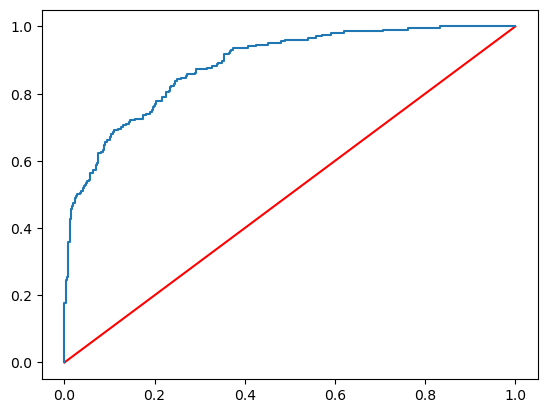

Do you want to keep the Model? Yesyes


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=7,
                                                     n_estimators=75)),
                             ('ada', AdaBoostClassifier(n_estimators=75)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            featu...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=75, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1, voting='soft')

In [84]:
estimators = [('rf', RandomForestClassifier(n_estimators= 75, max_depth= 7)),
             ('ada', AdaBoostClassifier(n_estimators= 75)),
             ('XGB', XGBClassifier(n_estimators= 75, max_depth= 7, n_jobs = -1))]
model_validation(VotingClassifier(estimators=estimators, voting='soft', n_jobs= -1), xtrain, ytrain, xtest, ytest)

# Stacking

Confusion Matrix
 [[768  28]
 [112  92]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.77      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000

ROC AUC SCORE
 0.886623682136171


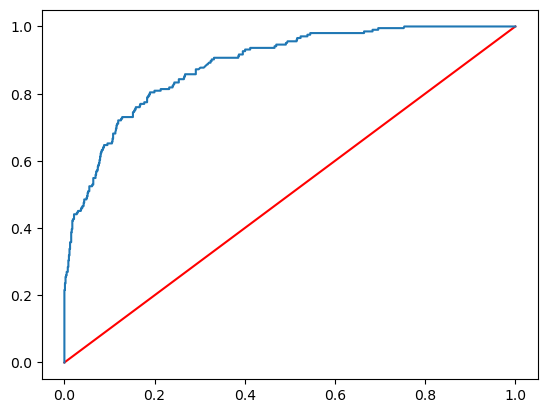

Do you want to keep the Model? Yesyes


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=75)),
                               ('ada', AdaBoostClassifier(n_estimators=75)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fea...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=75, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=GradientBoostingClassifier(max_depth=7,
                                                              n_estimators=75),
                   n_jobs=-1)

In [86]:
estimators = [('rf', RandomForestClassifier(n_estimators= 75, max_depth= 7)),
             ('ada', AdaBoostClassifier(n_estimators= 75)),
             ('XGB', XGBClassifier(n_estimators= 75, max_depth= 7, n_jobs = -1))]
model_validation(StackingClassifier(estimators=estimators, final_estimator= GradientBoostingClassifier(n_estimators= 75, max_depth= 7), n_jobs= -1), xtrain, ytrain, xtest, ytest)

In [87]:
score_df

,Model,Accuracy,Recall,Precision,F1 Score
0,RandomForestClassifier(n_estimators=70),0.873,0.475490,0.829060,0.604361
1,DecisionTreeClassifier(max_depth=8),0.858,0.450980,0.754098,0.564417
2,GaussianNB(),0.797,0.127451,0.509804,0.203922
3,AdaBoostClassifier(n_estimators=200),0.865,0.475490,0.776000,0.589666
4,"GradientBoostingClassifier(max_depth=7, n_esti...",0.870,0.490196,0.793651,0.606061
5,"XGBClassifier(base_score=None, booster=None, c...",0.865,0.514706,0.744681,0.608696
6,"VotingClassifier(estimators=[('rf',\n ...",0.876,0.475490,0.850877,0.610063
7,"StackingClassifier(estimators=[('rf',\n ...",0.860,0.450980,0.766667,0.567901


In [91]:
# Fine Tuning XGBoost
grid = {'n_estimators': [50,75,100,150,200,250],
       'gamma': [0,1,2,3],
       'max_depth': [5, 7, 9, 11, 15, 20, 25]}
gsxgb = GridSearchCV(estimator= XGBClassifier(), param_grid = grid, scoring='recall', n_jobs= -1)
gsxgb.fit(xtrain, ytrain)
gsxgb.best_params_

{'gamma': 0, 'max_depth': 7, 'n_estimators': 100}

In [92]:
gsxgb.best_score_

0.4904825717306175

Confusion Matrix
 [[760  36]
 [100 104]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.74      0.51      0.60       204

    accuracy                           0.86      1000
   macro avg       0.81      0.73      0.76      1000
weighted avg       0.85      0.86      0.85      1000

ROC AUC SCORE
 0.8627758892501723


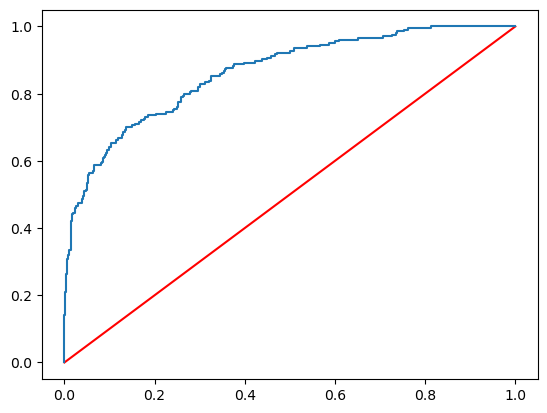

Do you want to keep the Model? Yesyes


In [94]:
final_model = model_validation(XGBClassifier(**gsxgb.best_params_), xtrain, ytrain, xtest, ytest)

# Save the Fitted Model

In [95]:
import pickle

In [96]:
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [97]:
xtrain.head(1)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
6730,631,2227,46,9,160736.63,1,0,1,93503.02,1


In [98]:
final_model.predict([[631,2227,46,9,160736.63,1,0,1,93503.02,1]])

array([0])

In [99]:
final_model.predict([[631,2227,46,9,160736.63,1,0,1,93503.02,1]])[0]

0

In [100]:
geo_encoding

{'France': 4519, 'Germany': 2254, 'Spain': 2227}